In [2]:
!pip install tensorflow tensorflow-gpu opencv-python mediapipe sklearn matplotlib

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 38.2/38.2 MB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 50.1/50.1 MB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 272.8/272.8 MB 3.5 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 4.0 MB/s eta 0:00:00
     ---------------------------------------- 14.7/14.7 MB 4.9 MB/s eta 0:00:00
     -------------------------------------- 440.7/440.7 kB 3.9 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 4.8 MB/s eta 0:00:00
     -------------------------------------- 126.5/126.5 kB 1.9 MB/s eta 0:00:00
     ---------------------------------------- 24.4/24.4 MB 4.5 MB/s eta 0:00:00


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [18 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\Shree\AppData\Local\Temp\pip-install-ey36aper\tensorflow-gpu_76215d31913442f5acb4e1ced5577071\setup.py", line 37, in <module>
      raise Exception(TF_REMOVAL_WARNING)
  Exception:
  
  The "tensorflow-gpu" package has been removed!
  
  Please install "tensorflow" instead.
  
  Other than the name, the two packages have been identical
  since TensorFlow 2.1, or roughly since Sep 2019. For more
  information, see: pypi.org/project/tensorflow-gpu
  
  
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  error: subprocess-exited-with-error
  
  Running setup.py install for tensorflow-gpu did not

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

keypoints using MEDIAPIPE HOLISTICS

In [9]:
mpHolistics = mp.solutions.holistic # mediapipe holistics model
mpDrawing = mp.solutions.drawing_utils # Drawing utilities

In [44]:
def mediapipeDetection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # as openCV take BGR therefore we convert it to RGB
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # we reverse it back from RGB to BGR
    return image, results

In [66]:
def drawLandmark(image, results):
    mpDrawing.draw_landmarks(image, results.face_landmarks, mpHolistics.FACEMESH_CONTOURS) # Draw face connections 
    mpDrawing.draw_landmarks(image, results.pose_landmarks, mpHolistics.POSE_CONNECTIONS) # Draw pose connections 
    mpDrawing.draw_landmarks(image, results.left_hand_landmarks, mpHolistics.HAND_CONNECTIONS) # Draw left hand connections 
    mpDrawing.draw_landmarks(image, results.right_hand_landmarks, mpHolistics.HAND_CONNECTIONS) # Draw right hand connections 

In [82]:
def drawStyleLandmark(image, results):
    mpDrawing.draw_landmarks(image, results.face_landmarks, mpHolistics.FACEMESH_CONTOURS,
                            mpDrawing.DrawingSpec(color = (80,110,10), thickness=1, circle_radius=1),
                            mpDrawing.DrawingSpec(color = (80,110,10), thickness=1, circle_radius=1)
                            ) # Draw face connections 
    mpDrawing.draw_landmarks(image, results.pose_landmarks, mpHolistics.POSE_CONNECTIONS,
                            mpDrawing.DrawingSpec(color = (80,22,10), thickness=2, circle_radius=4),
                            mpDrawing.DrawingSpec(color = (80,44,121), thickness=2, circle_radius=2)
                            ) # Draw pose connections 
    mpDrawing.draw_landmarks(image, results.left_hand_landmarks, mpHolistics.HAND_CONNECTIONS,
                            mpDrawing.DrawingSpec(color = (121,22,76), thickness=2, circle_radius=4),
                            mpDrawing.DrawingSpec(color = (121,44,250), thickness=2, circle_radius=2)
                            ) # Draw left hand connections 
    mpDrawing.draw_landmarks(image, results.right_hand_landmarks, mpHolistics.HAND_CONNECTIONS,
                            mpDrawing.DrawingSpec(color = (121,22,76), thickness=2, circle_radius=4),
                            mpDrawing.DrawingSpec(color = (121,44,250), thickness=, circle_radius=2)
                            ) # Draw right hand connections 

In [83]:
camera = cv2.VideoCapture(0)
with mpHolistics.Holistic(min_detection_confidence = 0.5, min_tracking_confidence=0.5,) as holistics:
    while camera.isOpened():
        ret, frame = camera.read() # reads the frame
        
        #make mediapipe holistic detection
        image, results = mediapipeDetection(frame, holistics)
#         print(results)
        
        #print landmark on live feed
        drawStyleLandmark(image, results)
        
        cv2.imshow('OpenCV Feed', image) # output the frames

        # Break the loop or camera
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    camera.release()
    cv2.destroyAllWindows()

In [39]:
# len(results.left_hand_landmarks.landmark)

21

In [57]:
# frame
results

mediapipe.python.solution_base.SolutionOutputs

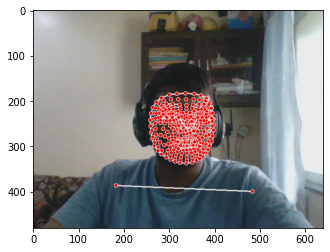

In [86]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))


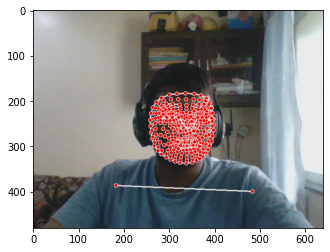

In [87]:
drawLandmark(frame, results)

plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))